In [1]:
# Cell 1: Installations
!pip install -q transformers datasets pandas torch accelerate scikit-learn sentencepiece

In [2]:
# Cell 2: Load Data and Initial Inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data from the CSV file
try:
    df = pd.read_csv('stroke_data_cleaned.csv')
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'stroke_data_cleaned.csv' not found. Please make sure it's in the correct directory.")

# Display the first 5 rows and some basic info to verify it's loaded correctly
if 'df' in locals():
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    print("\nDataset Information:")
    df.info()

✅ Data loaded successfully!

First 5 rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9816 entries, 0 to 9815
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9816 non-null   int64  
 1   gender             9816 non-null   object 
 2   age                9816 non-null   float64
 3   hypertension       9816 non-null   int64  
 4   heart_disease      9816 non-null   int64  
 5   ever_married       9816 non-null   object 
 6   work_type          9816 non-null   object 
 7   residence_type     9816 non-null   object 
 8   avg_glucose_level  9816 non-null   float64
 9   bmi                9816 non-null   float64
 10  smoking_status     9816 non-null   object 
 11  stroke             9816 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 920.4+ KB


In [3]:
# Cell 3: Data Cleaning and Preparation (Corrected & Robust)

# --- Step 1: Standardize Column Names ---
# This is a best practice to prevent KeyErrors. We convert all column names
# to lowercase to ensure consistency.
df.columns = df.columns.str.lower()


# --- Step 2: Convert 'bmi' to a numeric type ---
# Now we use the lowercase 'bmi'
df['bmi'] = pd.to_numeric(df['bmi'])


# --- Step 3: Convert Categorical Columns to Numerical ---
# We now use the all-lowercase column names in our list.
categorical_cols = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
df_prepared = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# The 'id' column is just an identifier, so we'll drop it.
df_prepared = df_prepared.drop('id', axis=1)


# --- Step 4: Verify the changes ---
print("✅ Data preparation complete.")
print("\nFirst 5 rows of the prepared dataset:")
display(df_prepared.head())

print("\nNew Dataset Information:")
df_prepared.info()

✅ Data preparation complete.

First 5 rows of the prepared dataset:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
2,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
3,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False
4,81.0,0,0,186.21,29.0,1,True,True,False,True,False,False,True,True,False,False



New Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9816 entries, 0 to 9815
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9816 non-null   float64
 1   hypertension                    9816 non-null   int64  
 2   heart_disease                   9816 non-null   int64  
 3   avg_glucose_level               9816 non-null   float64
 4   bmi                             9816 non-null   float64
 5   stroke                          9816 non-null   int64  
 6   gender_Male                     9816 non-null   bool   
 7   ever_married_Yes                9816 non-null   bool   
 8   work_type_Never_worked          9816 non-null   bool   
 9   work_type_Private               9816 non-null   bool   
 10  work_type_Self-employed         9816 non-null   bool   
 11  work_type_children              9816 non-null   bool   
 12  residenc

--- Starting Exploratory Data Analysis ---


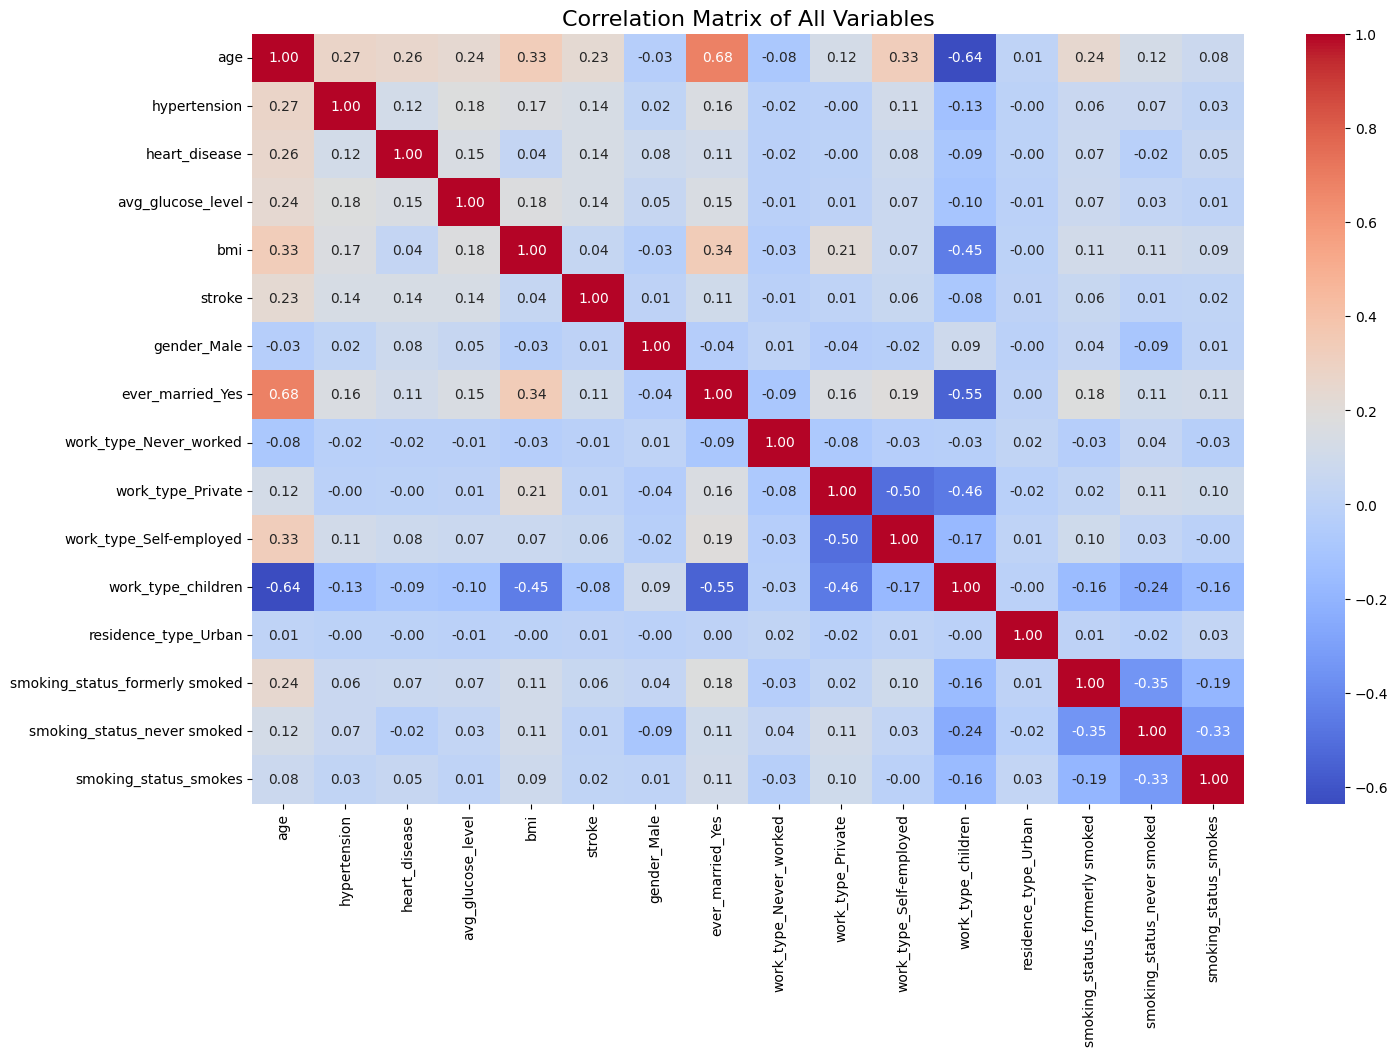

Stroke Distribution:
stroke
0    95.741646
1     4.258354
Name: proportion, dtype: float64



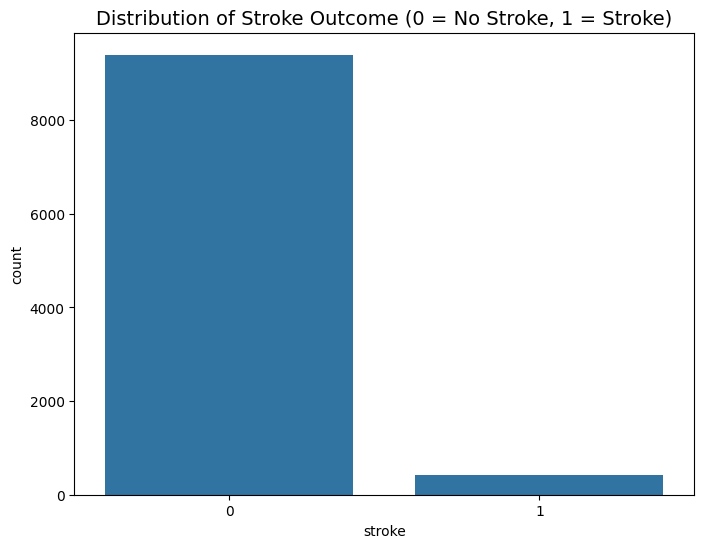

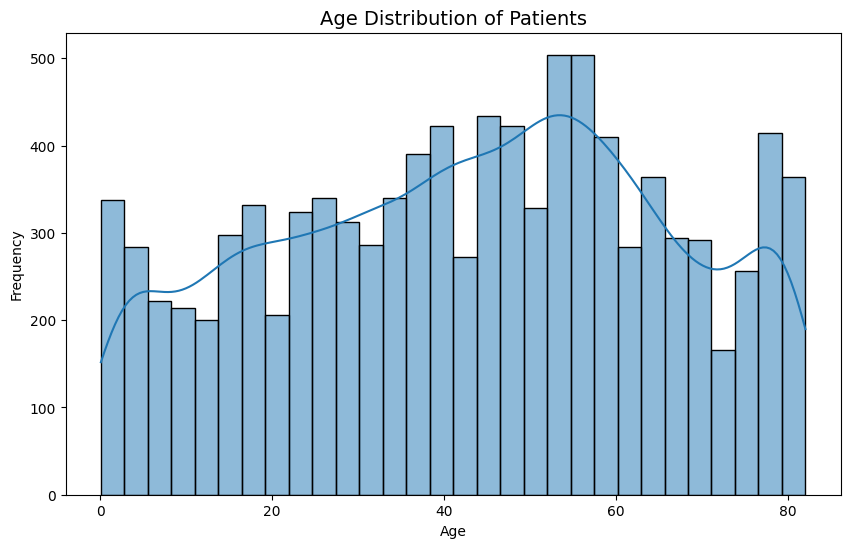

In [4]:
# Cell 4: Exploratory Data Analysis (EDA)

print("--- Starting Exploratory Data Analysis ---")

# Plot 1: Correlation Heatmap
# This is one of the most important plots. It shows how every variable is related to every other variable.
# We are especially interested in the 'stroke' row at the bottom.
plt.figure(figsize=(16, 10))
sns.heatmap(df_prepared.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Variables', fontsize=16)
plt.show()


# Plot 2: Stroke Outcome Distribution
# This plot shows us how many people in the dataset had a stroke vs. did not.
# This is critical for understanding if our dataset is "imbalanced".
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df_prepared)
plt.title('Distribution of Stroke Outcome (0 = No Stroke, 1 = Stroke)', fontsize=14)
# Calculating the percentage for better context
stroke_percentage = df_prepared['stroke'].value_counts(normalize=True) * 100
print(f"Stroke Distribution:\n{stroke_percentage}\n")


# Plot 3: Age Distribution
# This plot shows the age distribution of the patients in our dataset.
plt.figure(figsize=(10, 6))
sns.histplot(df_prepared['age'], kde=True, bins=30)
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Cell 5: Hypothesis Testing

from scipy.stats import ttest_ind, chi2_contingency

print("--- Starting Hypothesis Testing ---")

# --- Test 1: T-test for Age and Stroke ---
# Question: Is the average age of patients who had a stroke significantly different from those who didn't?
# A T-test is perfect for comparing the means of two groups.

# Separate the ages of the two groups
age_stroke = df_prepared[df_prepared['stroke'] == 1]['age']
age_no_stroke = df_prepared[df_prepared['stroke'] == 0]['age']

# Perform the independent T-test
t_stat, p_value_age = ttest_ind(age_stroke, age_no_stroke)

print("\n--- T-test: Age vs. Stroke Outcome ---")
print(f"P-value: {p_value_age}")

# We interpret the p-value. A common threshold for significance is 0.05.
if p_value_age < 0.05:
    print("✅ Result is statistically significant: The average age is significantly different for patients who had a stroke.")
else:
    print("❌ Result is not statistically significant: There is no significant difference in average age.")


# --- Test 2: Chi-Squared Test for Hypertension and Stroke ---
# Question: Is there a statistically significant association between having hypertension and having a stroke?
# A Chi-Squared test is used for categorical variables.

# Create a contingency table (a cross-tabulation)
contingency_table = pd.crosstab(df_prepared['hypertension'], df_prepared['stroke'])

# Perform the Chi-Squared test
chi2, p_value_hypertension, _, _ = chi2_contingency(contingency_table)

print("\n--- Chi-Squared Test: Hypertension vs. Stroke Outcome ---")
print(f"P-value: {p_value_hypertension}")

if p_value_hypertension < 0.05:
    print("✅ Result is statistically significant: There is a significant association between hypertension and stroke.")
else:
    print("❌ Result is not statistically significant: There is no significant association between hypertension and stroke.")

--- Starting Hypothesis Testing ---

--- T-test: Age vs. Stroke Outcome ---
P-value: 2.0232199205855074e-120
✅ Result is statistically significant: The average age is significantly different for patients who had a stroke.

--- Chi-Squared Test: Hypertension vs. Stroke Outcome ---
P-value: 9.921009642839352e-45
✅ Result is statistically significant: There is a significant association between hypertension and stroke.


--- Starting Predictive Analysis with XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:58:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


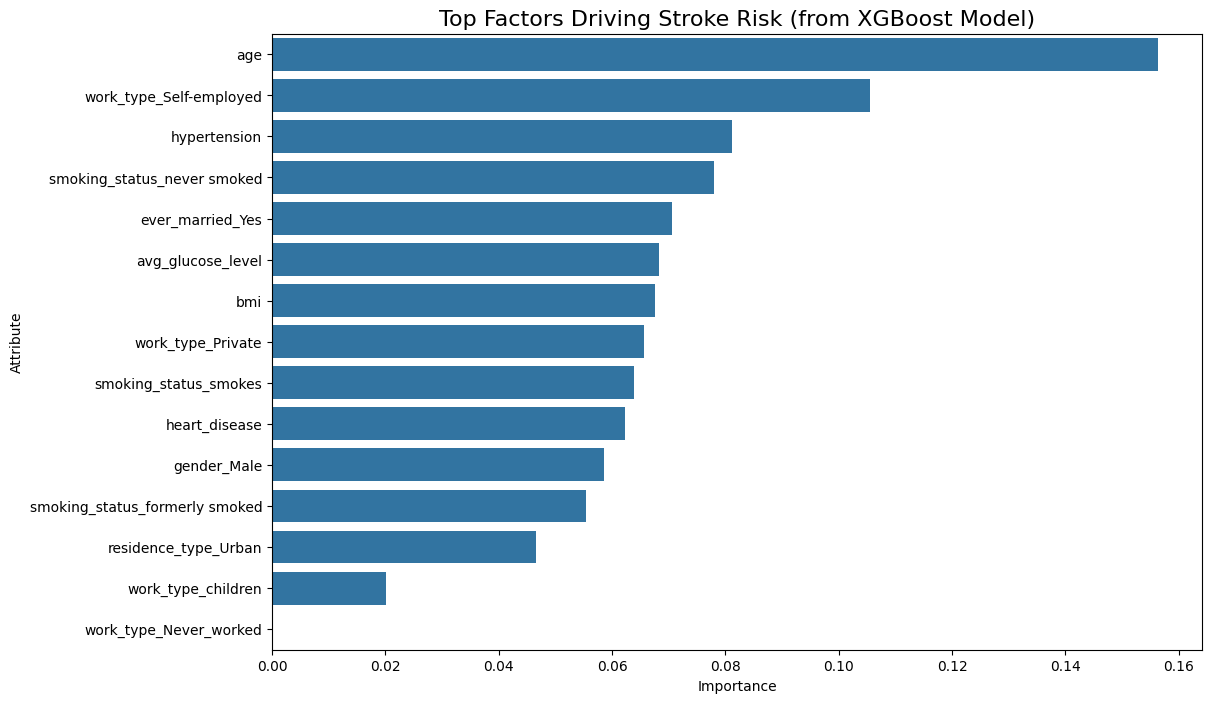


--- Model Insights ---
The bar chart above shows the most important factors for predicting a stroke, according to the powerful XGBoost model.
A higher importance score means the factor is more influential.


In [6]:
# Cell 6 (Upgraded): Predictive Analysis with XGBoost

# We need to install the xgboost library first
!pip install -q xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("--- Starting Predictive Analysis with XGBoost ---")

# --- Step 1: Define Features (X) and Target (y) ---
X = df_prepared.drop('stroke', axis=1)
y = df_prepared['stroke']

# --- Step 2: Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Step 3: Train the XGBoost Model ---
# Note: Scaling is not strictly necessary for tree-based models like XGBoost,
# but we'll fit it directly on the unscaled data for simplicity.
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# --- Step 4: Extract and Visualize Feature Importance ---
# XGBoost has a built-in feature importance calculator.
importance = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Attribute', data=importance)
plt.title('Top Factors Driving Stroke Risk (from XGBoost Model)', fontsize=16)
plt.show()

print("\n--- Model Insights ---")
print("The bar chart above shows the most important factors for predicting a stroke, according to the powerful XGBoost model.")
print("A higher importance score means the factor is more influential.")

In [7]:
# Cell 7: Export Final Data for Dashboarding

# Define the name for our final export file
output_filename = 'stroke_data_for_dashboard.csv'

# Save the prepared DataFrame to a CSV file
# We set index=False to avoid writing the DataFrame index as a column
df_prepared.to_csv(output_filename, index=False)

print(f"✅ Successfully exported the final dataset to '{output_filename}'.")
print("This file is now ready to be imported into Power BI.")

✅ Successfully exported the final dataset to 'stroke_data_for_dashboard.csv'.
This file is now ready to be imported into Power BI.


In [8]:
# New Cell: Export data for Power BI BEFORE one-hot encoding

# This is our cleaned DataFrame with the original text columns still intact.
df_for_powerbi = df.copy()

# Save it to a new CSV file
df_for_powerbi.to_csv('powerbi_source_data.csv', index=False)

print("✅ Successfully created 'powerbi_source_data.csv'. Use this file for your dashboard!")

✅ Successfully created 'powerbi_source_data.csv'. Use this file for your dashboard!
